Import basic tools and Dance Object, used for turning joint-position data into a dataframe of features

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObjNew import Dance

Use Dance class obj on data and make feature-dataframe. See data_proc.py for details.

In [2]:
from DanceProj1.data_proc import get_data

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

Make sure data is loaded

In [3]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


Turn the data into Dance objects. This is a class that has methods for computing features. See DanceObj.py for details - it is contained in data_to_features.

In [4]:
from DanceProj1.data_proc import data_to_features

dfBM, dfFM = data_to_features(dataBM, dataFM, sparse=True)

In [5]:
print('There are', len(dfFM.index), 'Advanced sequences and', len(dfBM.index), 'Basic sequences')

There are 199 Advanced sequences and 1199 Basic sequences


Check the dataframes

In [6]:
print('There are ', len(dfBM.columns)-2, 'features, plus the genre and id columns')
dfBM.head()

There are  21 features, plus the genre and id columns


,id,Genre,Expandedness,FootspaceX,Asym_RL_acc,Asym_IO_acc,Asym_TB_acc,corr_deviate_nose_x,corr_spacing_nose_x,corr_deviate_wrists_x,...,corr_deviate_ankles_x,corr_spacing_ankles_x,corr_deviate_nose_y,corr_spacing_nose_y,corr_deviate_wrists_y,corr_spacing_wrists_y,corr_deviate_RwristLknee_y,corr_spacing_RwristLknee_y,corr_deviate_ankles_y,corr_spacing_ankles_y
0,gBR_sBM_cAll_d05_mBR5_ch10,Break,1067.622148,28.720952,811.601870,-26.740843,722.143057,122.344538,9.686305,305.812563,...,231.245678,10.730723,147.639381,10.124011,275.004691,10.088708,2166.865261,10.014128,183.016728,9.704488
1,gBR_sBM_cAll_d05_mBR1_ch03,Break,1083.575293,40.506497,-1062.808853,671.970048,1063.658513,224.228229,10.428324,227.337389,...,1523.208663,10.306282,166.207128,10.590393,241.788787,10.146770,308.782094,10.160298,474.000550,10.408858
2,gBR_sBM_cAll_d06_mBR3_ch09,Break,985.561049,19.200499,-638.915156,82.161864,-170.463845,151.198135,11.118717,247.551341,...,170.459126,10.030414,113.405374,10.435879,173.644039,10.014910,1429.766592,9.959421,375.461423,10.038077
3,gBR_sBM_cAll_d06_mBR2_ch08,Break,1020.270512,32.199322,-49.327036,-236.923099,179.688000,205.198607,11.318952,259.194936,...,338.776220,10.136157,224.967100,10.620798,388.482951,10.499242,600.364225,9.955375,324.292481,10.330584
4,gBR_sBM_cAll_d05_mBR4_ch10,Break,1107.946863,34.094420,-357.711355,116.477395,61.245393,127.411628,10.964052,1176.244991,...,537.336783,10.199138,181.767000,10.272881,406.626411,10.248495,179.556951,10.281376,225.233545,9.862666


In [7]:
print(dfFM['Genre'].unique())

['Break' 'Pop' 'Lock' 'Midhop' 'LAhop' 'House' 'Waack' 'Krump'
 'Street Jazz' 'Ballet Jazz']


In [8]:
#make advanced dataframes for each genre
dfABJazz = dfFM[dfFM['Genre'] == 'Ballet Jazz'].drop(['Genre', 'id'], axis=1)
dfABreak = dfFM[dfFM['Genre'] == 'Break'].drop(['Genre', 'id'], axis=1)
dfAPop = dfFM[dfFM['Genre'] == 'Pop'].drop(['Genre', 'id'], axis=1)
dfALock = dfFM[dfFM['Genre'] == 'Lock'].drop(['Genre', 'id'], axis=1)
dfAMidhop = dfFM[dfFM['Genre'] == 'Midhop'].drop(['Genre', 'id'], axis=1)
dfALAhop = dfFM[dfFM['Genre'] == 'LAhop'].drop(['Genre', 'id'], axis=1)
dfAHouse = dfFM[dfFM['Genre'] == 'House'].drop(['Genre', 'id'], axis=1)
dfAWaack = dfFM[dfFM['Genre'] == 'Waack'].drop(['Genre', 'id'], axis=1)
dfAKrump = dfFM[dfFM['Genre'] == 'Krump'].drop(['Genre', 'id'], axis=1)
dfASJazz = dfFM[dfFM['Genre'] == 'Street Jazz'].drop(['Genre', 'id'], axis=1)

dfBBJazz = dfBM[dfBM['Genre'] == 'Ballet Jazz'].drop(['Genre', 'id'], axis=1)
dfBBreak = dfBM[dfBM['Genre'] == 'Break'].drop(['Genre', 'id'], axis=1)
dfBPop = dfBM[dfBM['Genre'] == 'Pop'].drop(['Genre', 'id'], axis=1)
dfBLock = dfBM[dfBM['Genre'] == 'Lock'].drop(['Genre', 'id'], axis=1)
dfBMidhop = dfBM[dfBM['Genre'] == 'Midhop'].drop(['Genre', 'id'], axis=1)
dfBLAhop = dfBM[dfBM['Genre'] == 'LAhop'].drop(['Genre', 'id'], axis=1)
dfBHouse = dfBM[dfBM['Genre'] == 'House'].drop(['Genre', 'id'], axis=1)
dfBWaack = dfBM[dfBM['Genre'] == 'Waack'].drop(['Genre', 'id'], axis=1)
dfBKrump = dfBM[dfBM['Genre'] == 'Krump'].drop(['Genre', 'id'], axis=1)
dfBSJazz = dfBM[dfBM['Genre'] == 'Street Jazz'].drop(['Genre', 'id'], axis=1)

In [9]:
#scale DfFm and dfBM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfFM_scaled = pd.DataFrame(scaler.fit_transform(dfFM.drop(['Genre', 'id'], axis=1)), columns=dfFM.drop(['Genre', 'id'], axis=1).columns)
dfBM_scaled = pd.DataFrame(scaler.fit_transform(dfBM.drop(['Genre', 'id'], axis=1)), columns=dfBM.drop(['Genre', 'id'], axis=1).columns)


In [10]:
# #drop id column and genre column
# dfFM.drop(['id', 'Genre'], axis=1, inplace=True)
# dfBM.drop(['id', 'Genre'], axis=1, inplace=True) 

<function matplotlib.pyplot.show(close=None, block=None)>

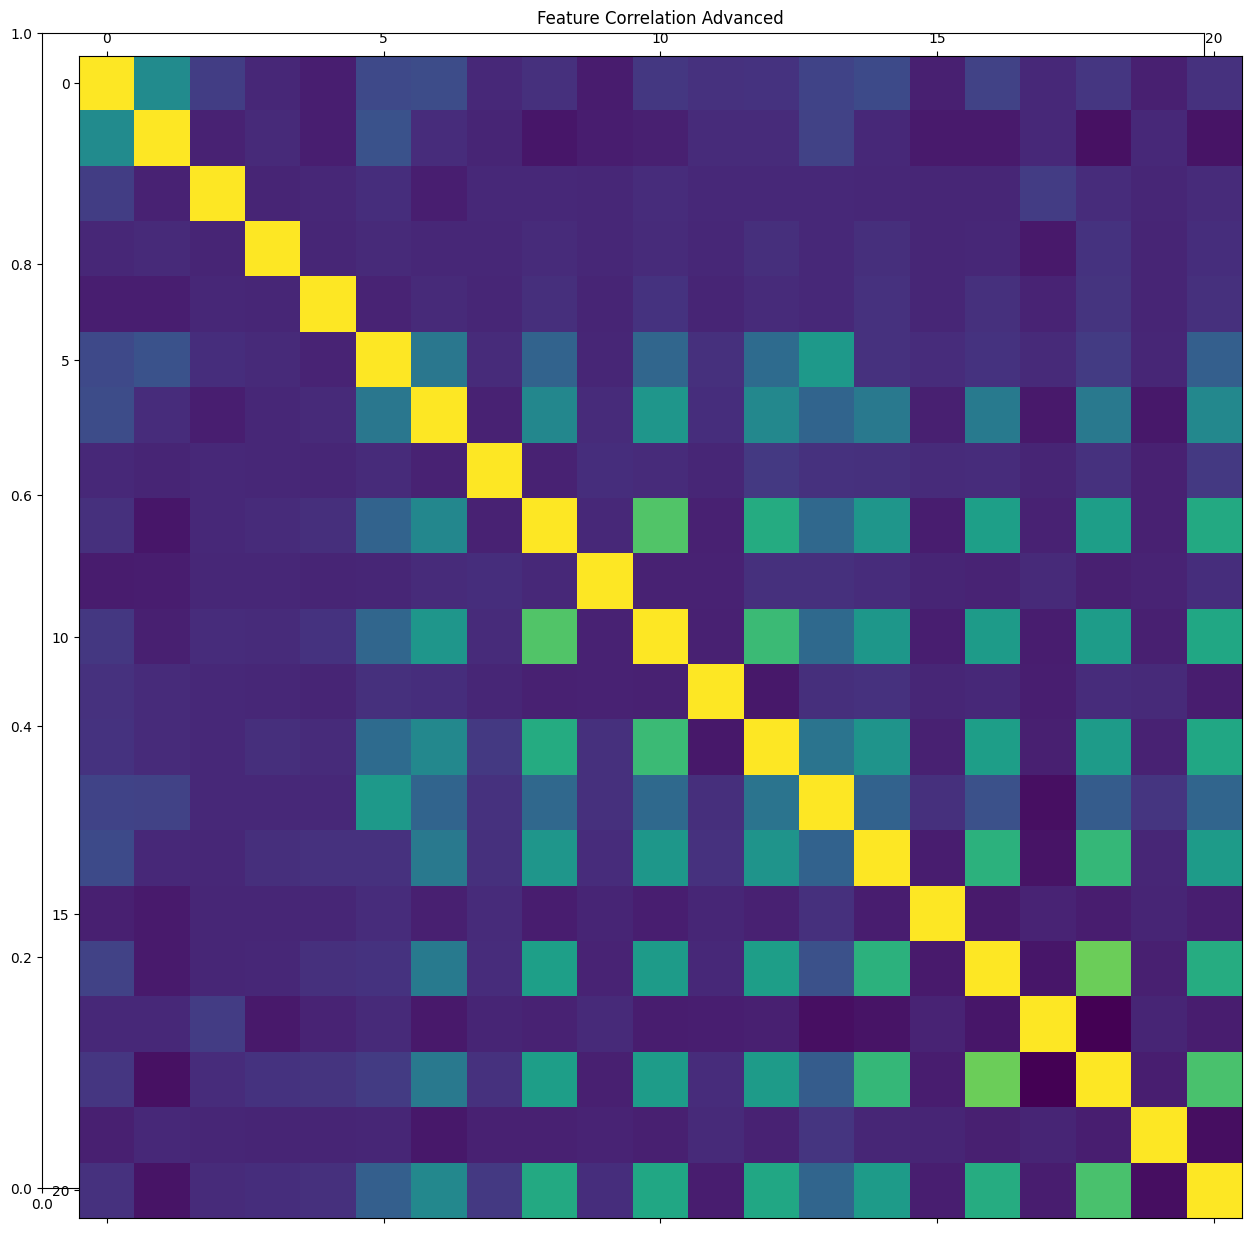

In [11]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15, 15))
plt.matshow(dfBM_scaled.corr(), interpolation='nearest', fignum=1)
plt.title('Feature Correlation Advanced')
#plt.savefig('AdvFeatCorr.png')
plt.show

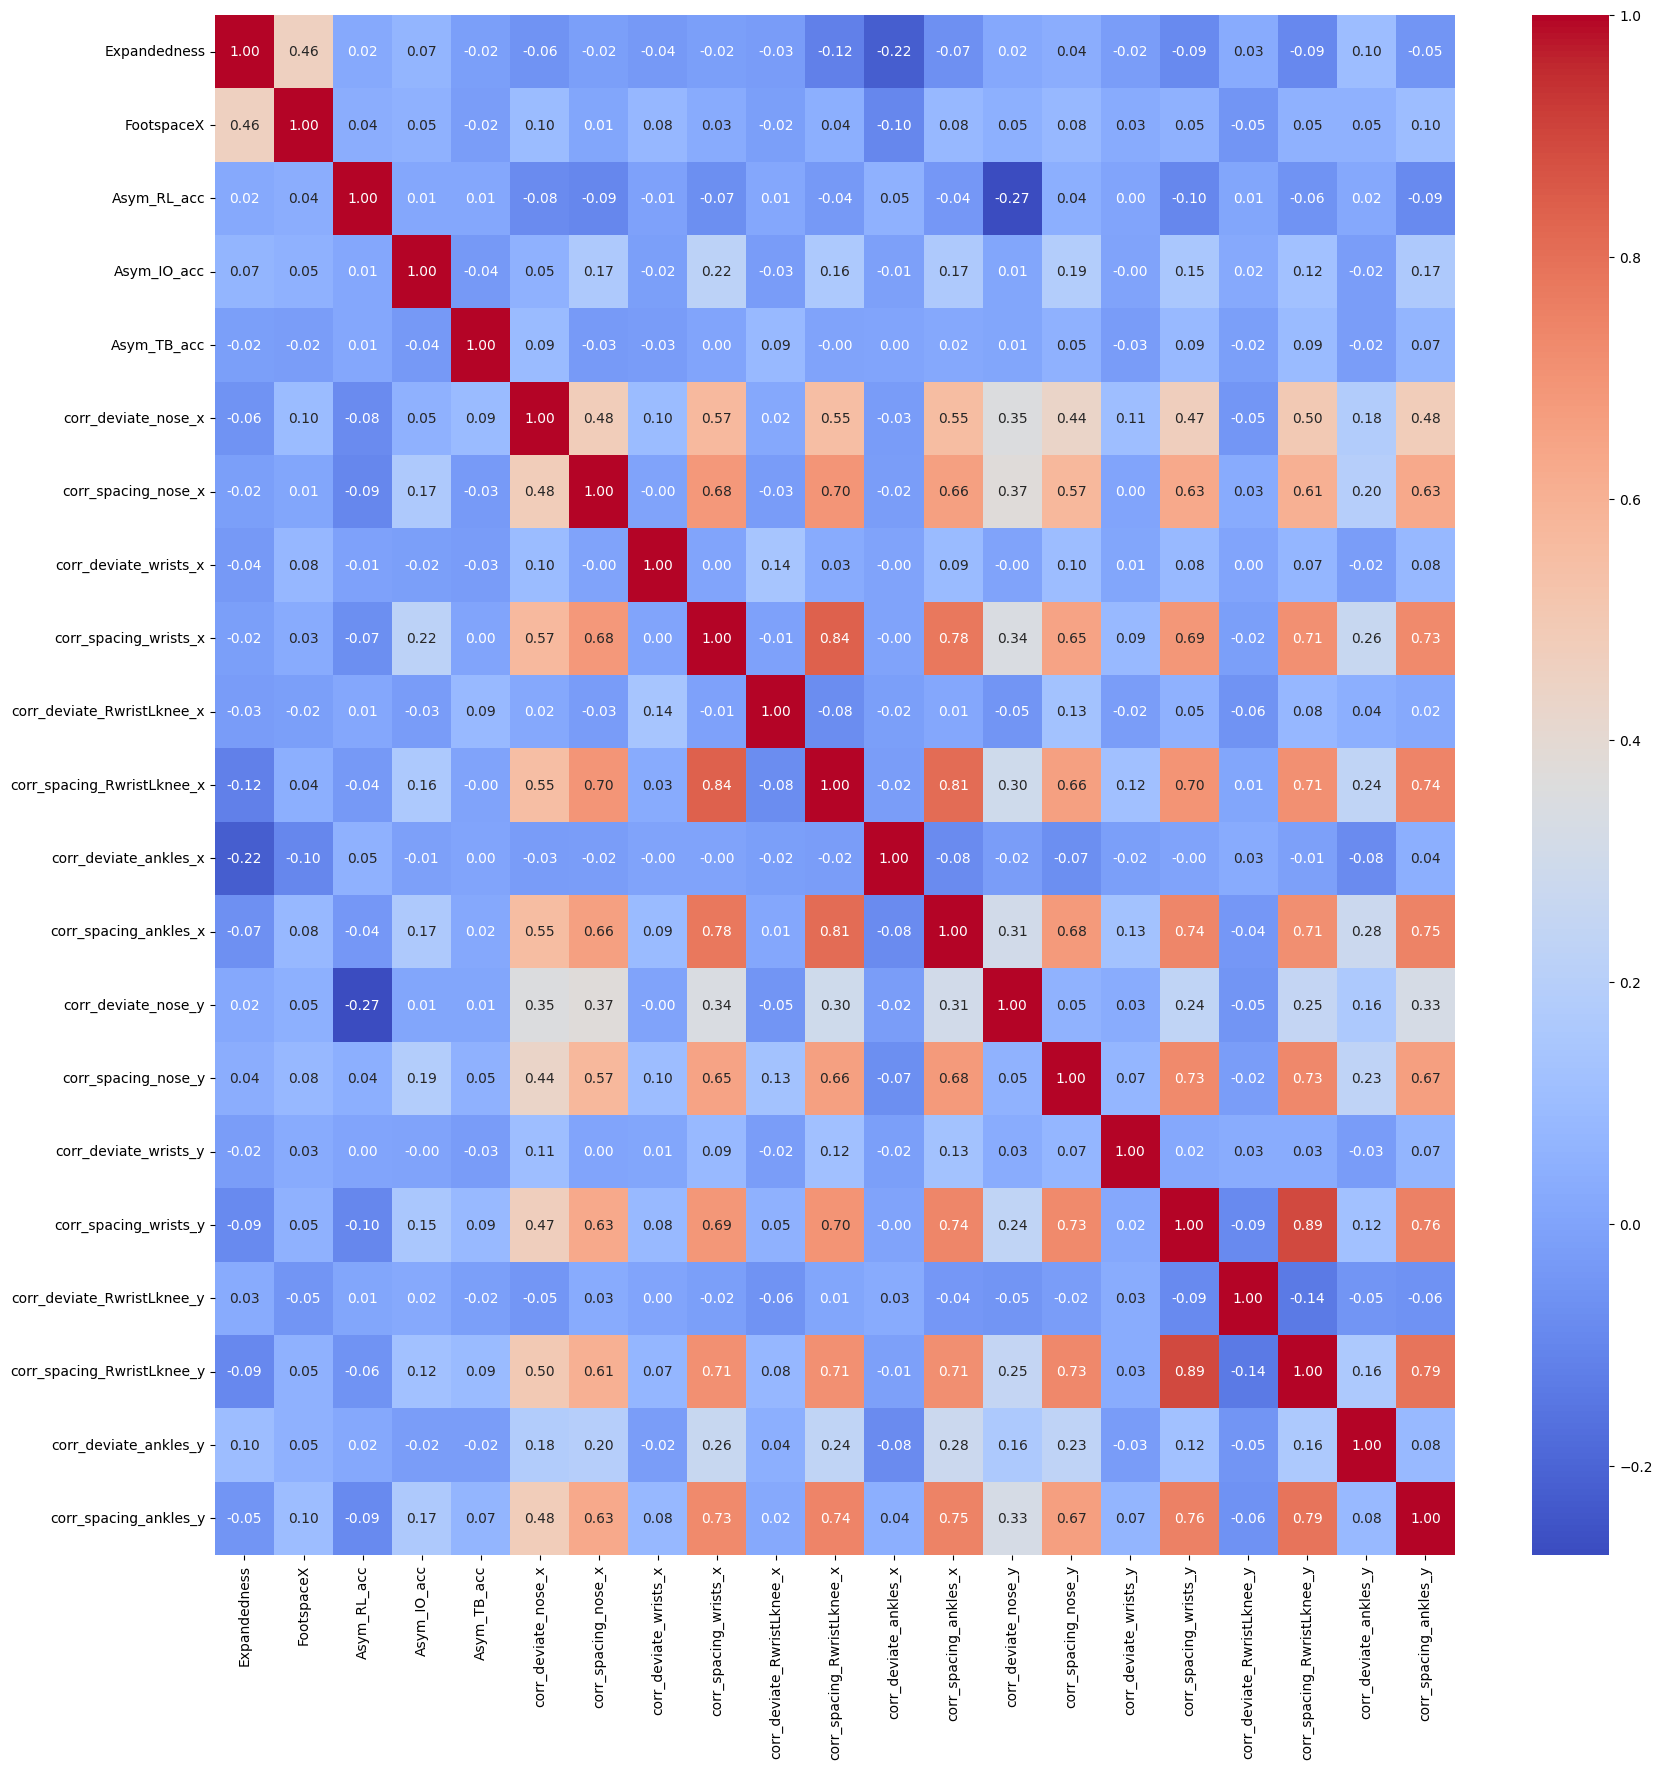

In [12]:
#plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(dfFM_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
#note bounciness relates to expantion - negative with min distance, positive with higher derivaties

<function matplotlib.pyplot.show(close=None, block=None)>

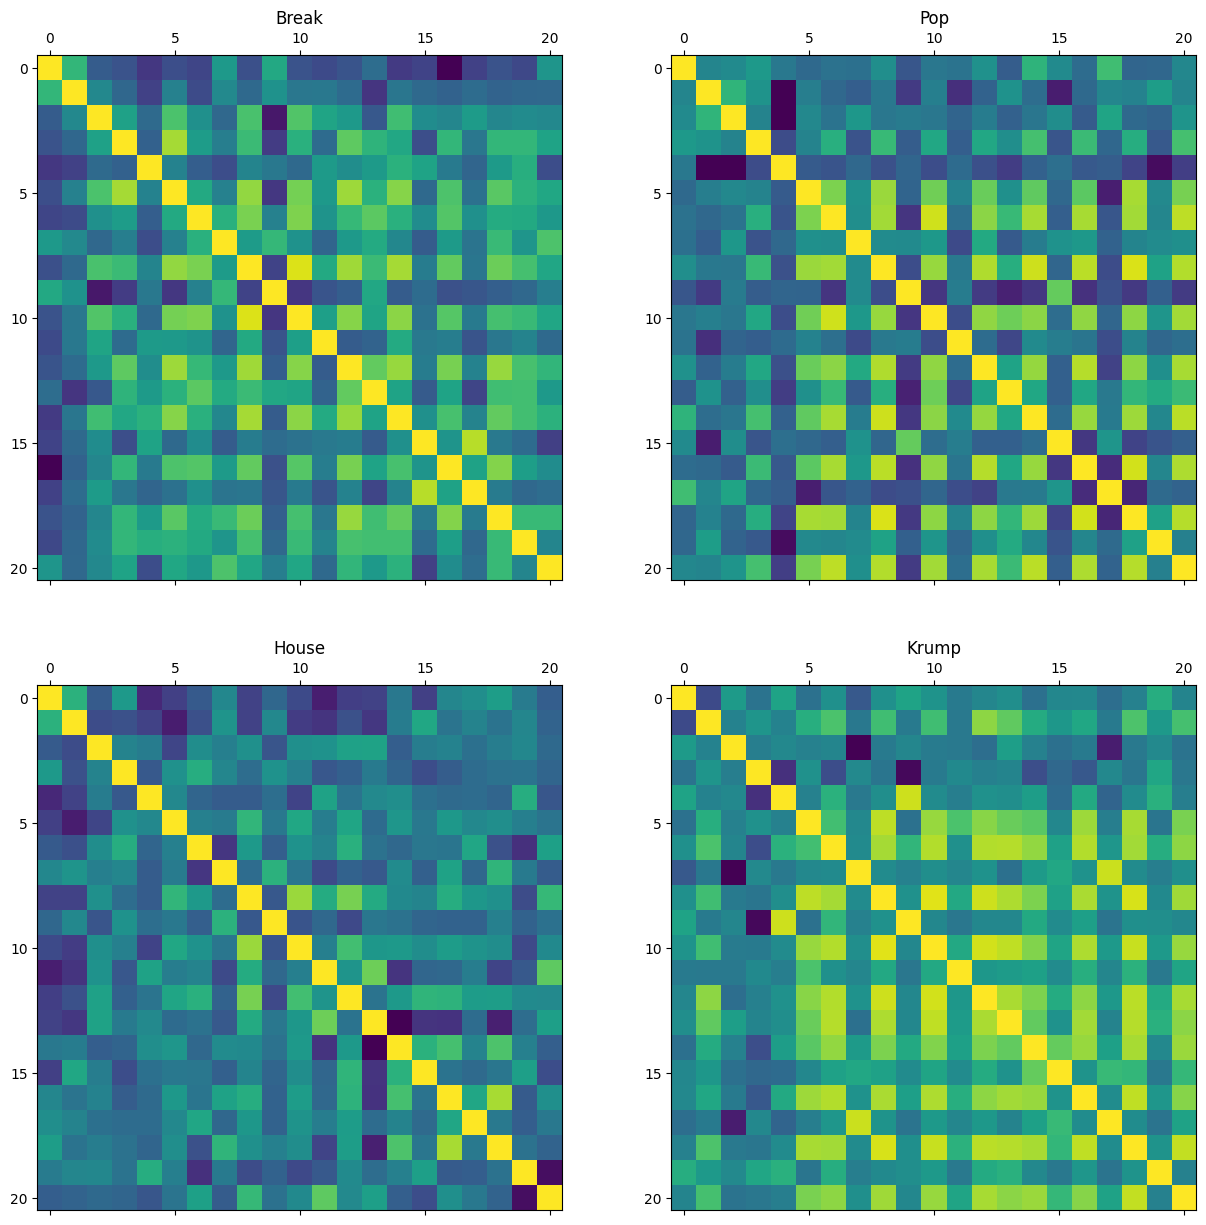

In [13]:
# two by two subplots of the correlation matrices for Break, Pop, House, Krump
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfABreak.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump.corr())
axs[1, 1].set_title('Krump')
#plt.savefig('AdvFeatCorr_BreakPopHouseKrump.png')
#plt.savefig('AdvFeatCorr_BreakPopHouseKrump_sparse.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

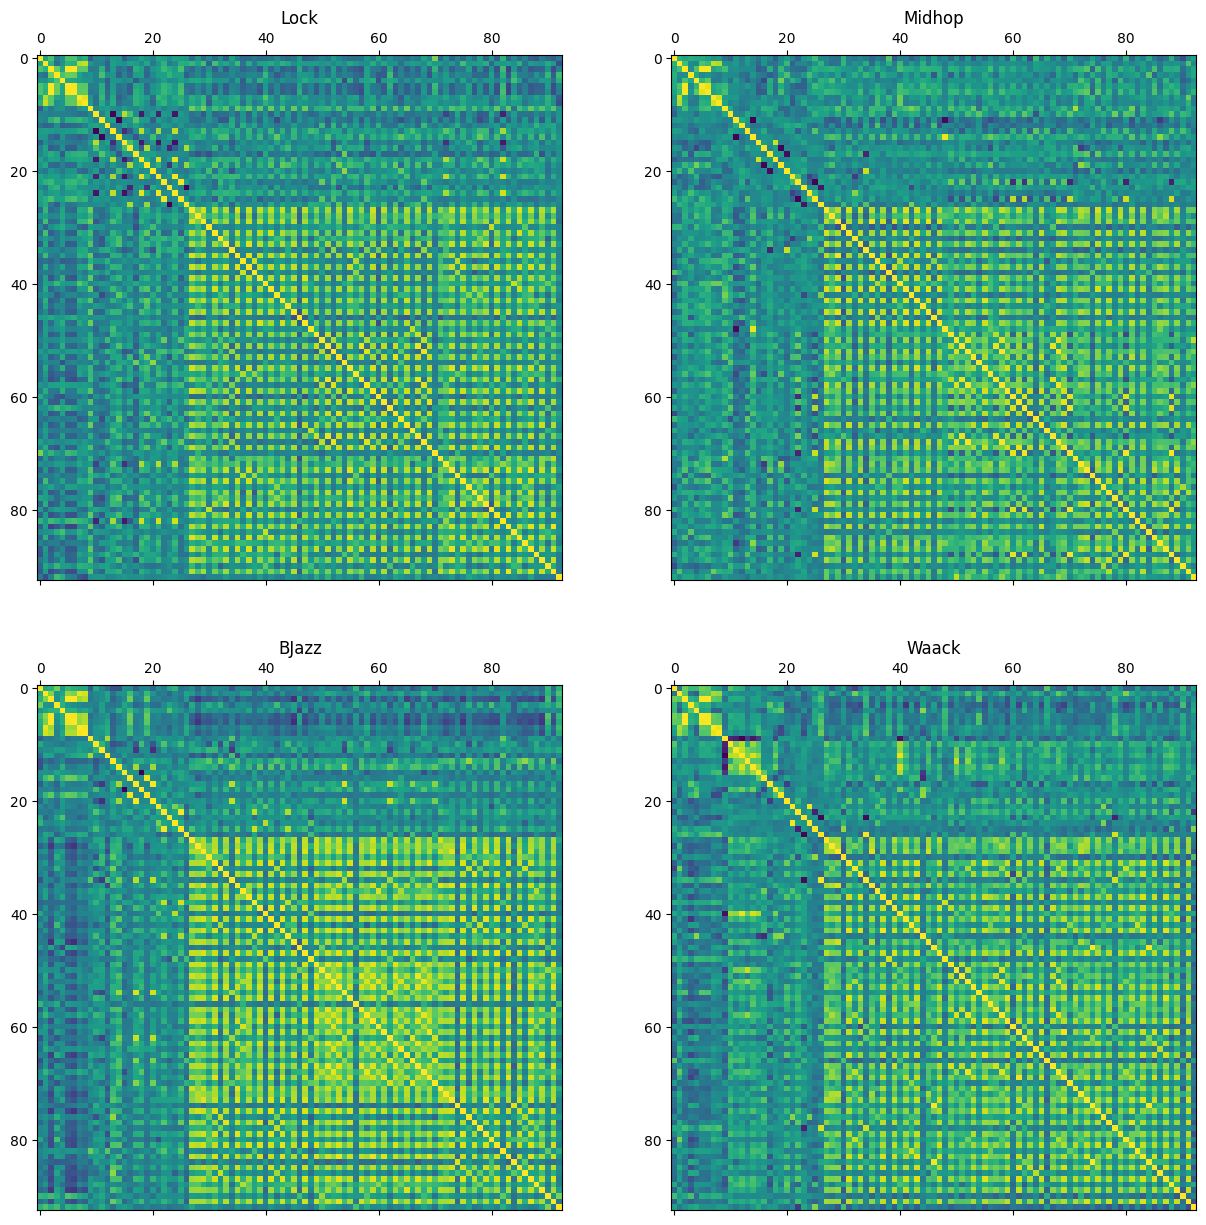

In [13]:
# two by two subplots of the correlation matrices for Lock, Midhop, BJazz, Waack, Basic
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].matshow(dfALock.corr())
axs[0, 0].set_title('Lock')
axs[0, 1].matshow(dfAMidhop.corr())
axs[0, 1].set_title('Midhop')
axs[1, 0].matshow(dfABJazz.corr())
axs[1, 0].set_title('BJazz')
axs[1, 1].matshow(dfAWaack.corr())
axs[1, 1].set_title('Waack')
plt.savefig('SparseCorr_LockMidhopBJazzWaack.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

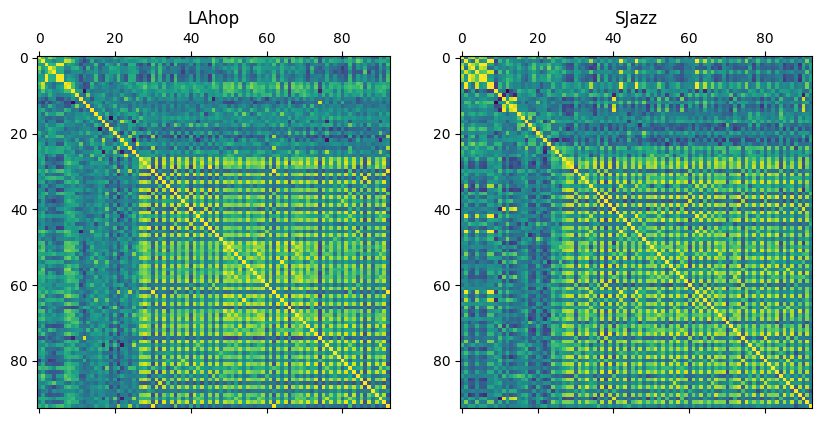

In [18]:
# two by two subplots of the correlation matrices for LAhop, SJazz, House, Krump
fig, axs = plt.subplots(1, 2, figsize=(10, 20))
axs[0].matshow(dfALAhop.corr())
axs[0].set_title('LAhop')
axs[1].matshow(dfASJazz.corr())
axs[1].set_title('SJazz')
plt.savefig('SpraseCorr_LAhopSJazz.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

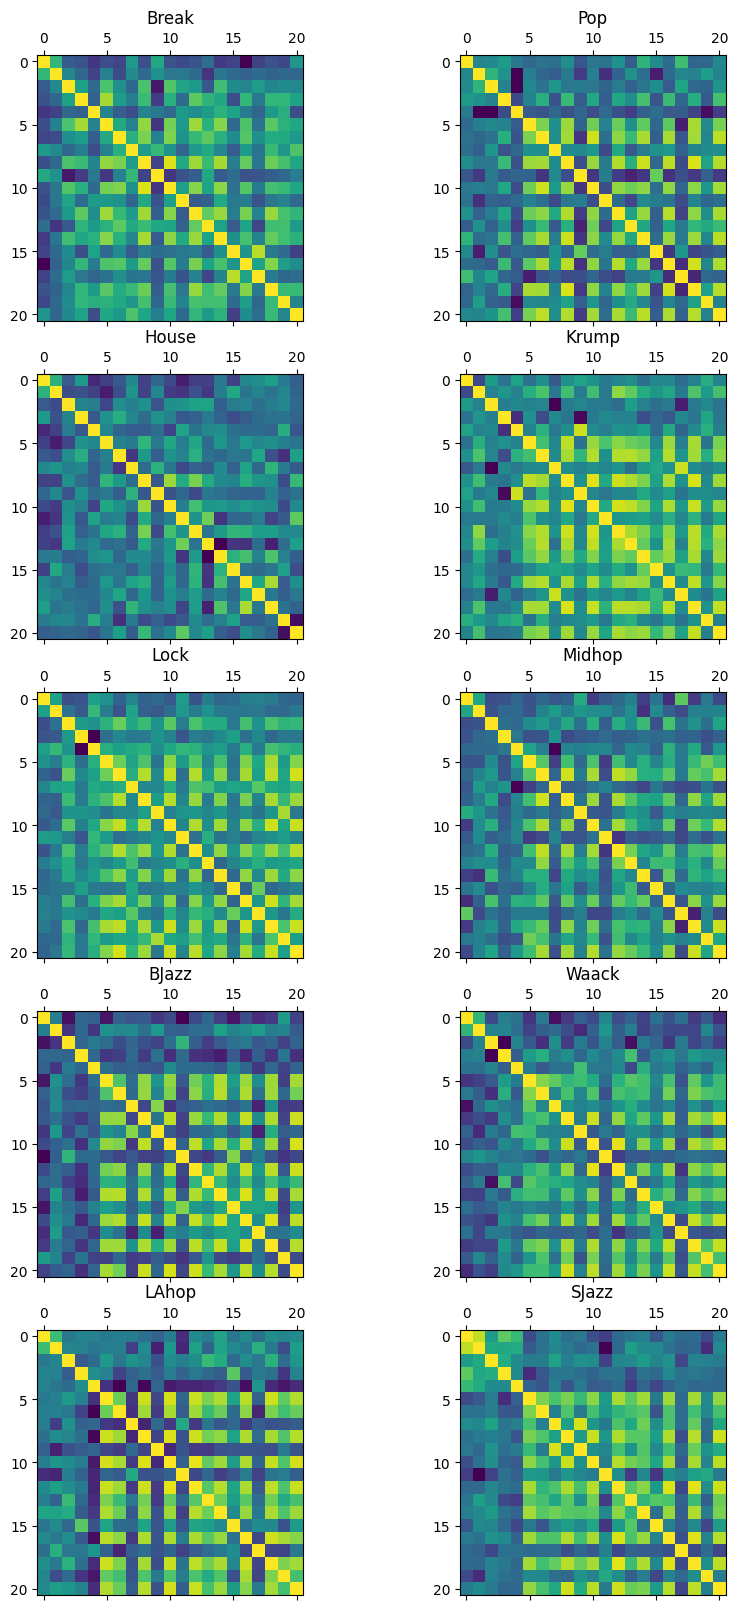

In [14]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))

axs[0, 0].matshow(dfABreak.corr())
axs[0, 0].set_title('Break')
axs[0, 1].matshow(dfAPop.corr())
axs[0, 1].set_title('Pop')
axs[1, 0].matshow(dfAHouse.corr())
axs[1, 0].set_title('House')
axs[1, 1].matshow(dfAKrump.corr())
axs[1, 1].set_title('Krump')
axs[2, 0].matshow(dfALock.corr())
axs[2, 0].set_title('Lock')
axs[2, 1].matshow(dfAMidhop.corr())
axs[2, 1].set_title('Midhop')
axs[3, 0].matshow(dfABJazz.corr())
axs[3, 0].set_title('BJazz')
axs[3, 1].matshow(dfAWaack.corr())
axs[3, 1].set_title('Waack')
axs[4, 0].matshow(dfALAhop.corr())
axs[4, 0].set_title('LAhop')
axs[4, 1].matshow(dfASJazz.corr())
axs[4, 1].set_title('SJazz')
plt.savefig('featurecorr_genres_sparse.png')
plt.show

In [24]:
# dfFExpa = dfFM[['Expandedness','Expandedness_range','Expandedness_min','Expandedness_std',
#                 'Expandednessvel','Expandednessvel_max','Expandednessvel_min','Expandednessvel_std',
#                 'Expandednessacc','Expandednessacc_max','Expandednessacc_min','Expandednessacc_std',
#                 'Expandednessjer','Expandednessjer_max','Expandednessjer_min','Expandednessjer_std']]
# dfFExpa.head()

In [25]:
# dfFExpa = dfFM[['Expandedness','Expandedness_max','Expandedness_min','Expandedness_std',
#                 'Expandednessvel','Expandednessvel_max','Expandednessvel_min','Expandednessvel_std',
#                 'Expandednessacc','Expandednessacc_max','Expandednessacc_min','Expandednessacc_std',
#                 'Expandednessjer','Expandednessjer_max','Expandednessjer_min','Expandednessjer_std']]
# dfFExpa.head()
# labels = ['meanD','maxD','minD','stdD','meanV','maxV','minV','stdV','meanA','maxA','minA','stdA','meanJ','maxJ','minJ','stdJ']

In [26]:
# dfFAsym = dfFM[['Asym_RL_vel','Asym_RL_acc','Asym_RL_jer','Asym_RL_vel_std','Asym_RL_acc_std','Asym_RL_jer_std',
#                 'Asym_IO_vel','Asym_IO_acc','Asym_IO_jer','Asym_IO_vel_std','Asym_IO_acc_std','Asym_IO_jer_std',
#                 'Asym_TB_vel','Asym_TB_acc','Asym_TB_jer','Asym_TB_vel_std','Asym_TB_acc_std','Asym_TB_jer_std']]
# dfFAsym.head()

In [27]:
# #dfFAutocorr is dfFM without the Expa columns and without the Asym columns
# dfFAutocorr = dfFM.drop(['Expandedness','Expandedness_max','Expandedness_min','Expandedness_std',
#                 'Expandednessvel','Expandednessvel_max','Expandednessvel_min','Expandednessvel_std',
#                 'Expandednessacc','Expandednessacc_max','Expandednessacc_min','Expandednessacc_std',
#                 'Expandednessjer','Expandednessjer_max','Expandednessjer_min','Expandednessjer_std',
#                 'Asym_RL_vel','Asym_RL_acc','Asym_RL_jer','Asym_RL_vel_std','Asym_RL_acc_std','Asym_RL_jer_std',
#                 'Asym_IO_vel','Asym_IO_acc','Asym_IO_jer','Asym_IO_vel_std','Asym_IO_acc_std','Asym_IO_jer_std',
#                 'Asym_TB_vel','Asym_TB_acc','Asym_TB_jer','Asym_TB_vel_std','Asym_TB_acc_std','Asym_TB_jer_std'], axis=1)

# dfFAutocorr.head()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(8, 8))
labelsExpa = ['meanD','maxD','minD','stdD','meanV','maxV','minV','stdV','meanA','maxA','minA','stdA','meanJ','maxJ','minJ','stdJ']
plt.matshow(dfFExpa.corr(), interpolation='nearest', fignum=1, cmap='coolwarm')
plt.xticks(range(len(labelsExpa)), labelsExpa, rotation=90)
plt.yticks(range(len(labelsExpa)), labelsExpa)
#plt.savefig('AdvExpaCorr.png')
plt.title('Expandedness Features Correlation Matrix')
plt.show
#notes
#means and maxes are not correlated, mean and min are. Min is not correlated with anything else
#maxes and std are correlated, particularly Distance and Accel
#across Vel, Acc and Jer, maxes and stds are all correlated, and somewhat with means. 
#mins across derivatives are only correlated with each other

In [ ]:
fig = plt.subplots(figsize=(8, 8))
labelsAsym = ['RL_vel','RL_acc','RL_jer','RL_vel_std','RL_acc_std','RL_jer_std',
                'IO_vel','IO_acc','IO_jer','IO_vel_std','IO_acc_std','IO_jer_std',
                'TB_vel','TB_acc','TB_jer','TB_vel_std','TB_acc_std','TB_jer_std']
plt.matshow(dfFAsym.corr(), interpolation='nearest', fignum=1, cmap='coolwarm')
plt.xticks(range(len(labelsAsym)), labelsAsym, rotation=90)
plt.yticks(range(len(labelsAsym)), labelsAsym)
#plt.savefig('AdvAsymCorr.png')
plt.title('Asymmetry Features Correlation Matrix')
plt.show
#notes
#RL and vel and acc anticorr with std, IO vel is, jer pos corr with std though
#TB is diff though, in fact TB accel is pos corr with std


In [ ]:
import matplotlib.pyplot as plt
labels = dfFAutocorr.columns
fig = plt.subplots(figsize=(18, 18))
plt.matshow(dfFAutocorr.corr(), interpolation='nearest', fignum=1, cmap='coolwarm')
plt.yticks(range(len(labels)), labels)
plt.title('Autocorrelation Features Correlation Matrix')
#plt.savefig('AdvAutocorrCorr.png')
plt.show



In [ ]:
dfFExpaCorr = dfFExpa.copy()
dfFExpaCorr['Autocorr_sac_height_axz'] = dfFAutocorr['Autocorr_sac_height_axz']
dfFExpaCorr['Autocorr_sac_prominence2_axz'] = dfFAutocorr['Autocorr_sac_prominence2_axz']
dfFExpaCorr['Autocorr_sac_prominence_axz_std'] = dfFAutocorr['Autocorr_sac_prominence_axz_std']
dfFExpaCorr['Autocorr_sac_height_ay'] = dfFAutocorr['Autocorr_sac_height_ay']
dfFExpaCorr['Autocorr_sac_prominence2_ay'] = dfFAutocorr['Autocorr_sac_prominence2_ay']
dfFExpaCorr['Autocorr_sac_prominence_ay_std'] = dfFAutocorr['Autocorr_sac_prominence_ay_std']
dfFExpaCorr.drop(['Expandednessvel','Expandednessvel_max', 'Expandednessvel_min', 'Expandednessvel_std',
                'Expandednessacc', 'Expandednessacc_max', 'Expandednessacc_min', 'Expandednessacc_std'], axis=1, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
labels = dfFExpaCorr.columns
fig = plt.subplots(figsize=(18, 18))
plt.matshow(dfFExpaCorr.corr(), interpolation='nearest', fignum=1, cmap='coolwarm')
plt.yticks(range(len(labels)), labels)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.title('Expa and XZ autocorr Features Correlation Matrix')
plt.savefig('Expa and XZ autocorr.png')
plt.show